# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [3]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

# Code Description:
# Read CSV file from URL, set  "Date" column as  Datetime Index, using index_col, parse_dates and infer_datetime_format
# parameters of the pd.read_csv function.
# Drop rows w/ missing values wropna function.
# Display the first and last five rows.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True,
    infer_datetime_format=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [4]:
# View summary statistics for DataFrame
df_mercado_trends.describe()

,Search Trends
count,37106.000000
mean,48.128739
std,27.171429
min,0.000000
25%,24.000000
50%,51.000000
75%,68.000000
max,125.000000


In [5]:
# View data types in DataFrame
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


In [6]:
# Find the number of months represented in full dataset.
num_months = df_mercado_trends.index.to_period('M').nunique()
print(f"Number of Months represented in full dataset: {num_months}")
print()

Number of Months represented in full dataset: 52



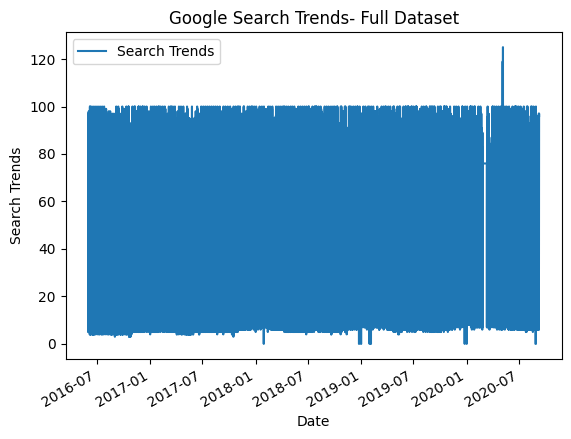

In [7]:
# Plot df to visualize the data.

# Code Description:
# plot() method of the DataFrame is used to create a line plot
# of the data in the DataFrame.  The x-axis is the index (date)
# and the y-axis is the value of the DataFrame (search trend value).

import matplotlib.pyplot as plt

df_mercado_trends.plot(y='Search Trends')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.title('Google Search Trends- Full Dataset')
plt.show()

# Optional: save plot to a file in the current working directory.
# plt.savefig('Google Search Trends - May 2020.png')

# Alternatively:
# plt.savefig('/path/to/your/directory/plot.png')

# Optional: alternative, libraries like plotly, bokey or seaborn can be used
# when display features like zooming, panning and tooltips are desired.

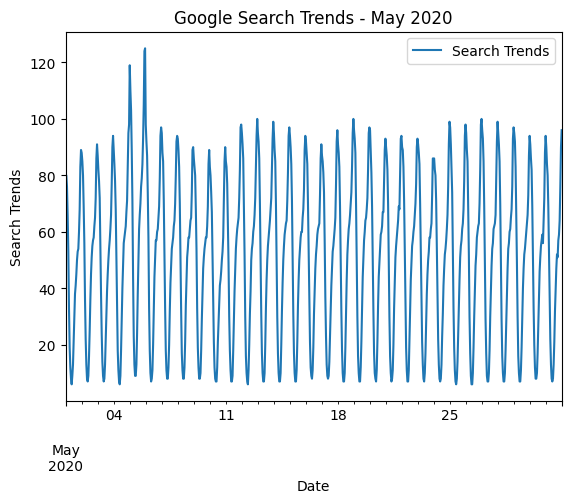

In [8]:
# Slice the DataFrame to just the month of May 2020

# Code Description:
# Use .loc accessor w/ boolean condition.  This creates a new DataFrame
# containing only the rows where the condition is True, i.e., the rows
# where date matches May 2020.
df_may_2020 = df_mercado_trends.loc['2020-05']

# Plot to visualize the data for May 2020

# Code Description:
# plot() method of the DataFrame is used to create a line plot
# of the data in the DataFrame.  The x-axis is the index (date)
# and the y-axis is the value of the DataFrame (search trend value).

import matplotlib.pyplot as plt

df_may_2020.plot(y='Search Trends')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.title('Google Search Trends - May 2020')
plt.show()

# Optional: save plot to a file in the current working directory.
# plt.savefig('Google Search Trends - May 2020.png')

# Alternatively:
# plt.savefig('/path/to/your/directory/plot.png')

# Optional: alternative, libraries like plotly, bokey or seaborn can be used
# when display features like zooming, panning and tooltips are desired.

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [9]:
# Calculate total search traffic for May 2020
traffic_may_2020 = df_may_2020['Search Trends'].sum()

# View the traffic_may_2020 value
print(f"Total search traffic for May 2020: {traffic_may_2020:,}")
print()

# Calculate total search traffic for full dataset
traffic_full_dataset = df_mercado_trends['Search Trends'].sum()

# View the traffic_may_2020 value
print(f"Total search traffic for full datset: {traffic_full_dataset:,}")
print()

Total search traffic for May 2020: 38,181

Total search traffic for full datset: 1,785,865



In [10]:
# Calculate median monthly search traffic for May 2020.
median_traffic_may_2020 = df_may_2020['Search Trends'].median()
print(f"May 2020 median search traffic: {median_traffic_may_2020}")
print()

# First, find the median traffic across full dataset.
median_traffic_full_dataset = df_mercado_trends['Search Trends'].median()
print(f"Full Dataset median search traffic: {median_traffic_full_dataset}")
print()

May 2020 median search traffic: 54.0

Full Dataset median search traffic: 51.0



In [11]:
# Group DataFrame by index year and then index month, chain sum and then median functions
df_grouped = df_mercado_trends.groupby([df_mercado_trends.index.year, df_mercado_trends.index.month]).agg({'Search Trends': ['sum', 'median']})

# View the first and last five rows of the DataFrame
display(df_grouped.head())
display(df_grouped.tail())

Search Trends       
                    sum median
Date Date                     
2016 6            33196   50.0
     7            33898   48.5
     8            34459   50.0
     9            32376   47.0
     10           32334   45.0

Search Trends       
                    sum median
Date Date                     
2020 5            38181   54.0
     6            35758   53.0
     7            35620   50.0
     8            33530   48.0
     9             8126   49.0

In [12]:
# To compare the seach traffic for the month of May 2020 to the overall monthly median value,
# divide the may traffic total by the median monthly traffic

print(f"May 2020 median search traffic: {median_traffic_may_2020}")
print()

print(f"Full Dataset median search traffic: {median_traffic_full_dataset}")
print()

ratio = median_traffic_may_2020 / median_traffic_full_dataset

print(f"Ratio of May 2020 median traffic to full dataset median traffic: {ratio:.4f}")
print()

percent_diff = (ratio * 100) - 100
print(f"May 2020 median search traffic was {percent_diff:.1f}% greater than the full dataset median search traffic.")
print()


May 2020 median search traffic: 54.0

Full Dataset median search traffic: 51.0

Ratio of May 2020 median traffic to full dataset median traffic: 1.0588

May 2020 median search traffic was 5.9% greater than the full dataset median search traffic.



##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** May 2020 median search traffic was 54.0, while the monthly median search traffic, across 52 months, was 51.0. If MercadoLibre released its financial results only in May 2020, the search traffic increased during May 2020, by 5.9%.  With the assumption regarding timing and frequency of financial results release in place, the answer to the question is 'yes'.

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

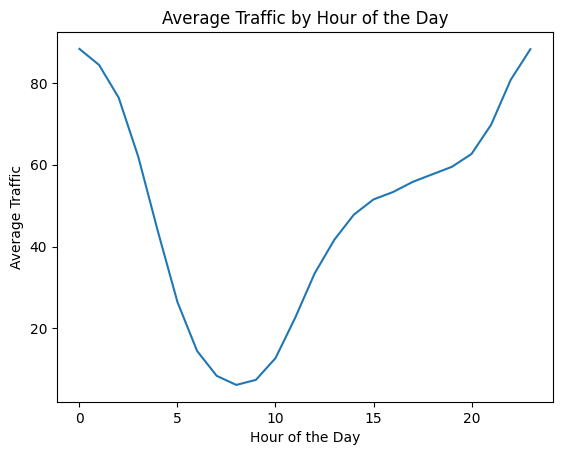

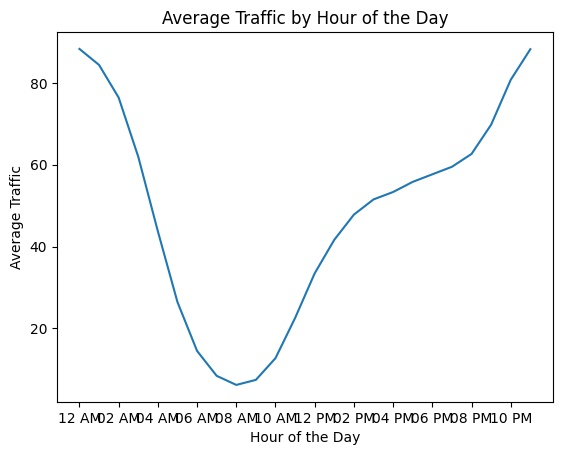

In [19]:
# Group the hourly search data to plot the average traffic by the hour of the day.
df_hourly_avg = df_mercado_trends.groupby(df_mercado_trends.index.hour)['Search Trends'].mean()

# Plot the average traffic by hour
df_hourly_avg.plot(kind='line', xlabel='Hour of the Day', ylabel='Average Traffic')
plt.title('Average Traffic by Hour of the Day')
plt.show()

#########################################
# Try to figure out if 12 is noon or midnight.

# Plot the average traffic by hour
plt.plot(df_hourly_avg.index, df_hourly_avg)

# Customize x-axis labels to display AM/PM format
hour_labels = [pd.to_datetime(str(i), format='%H').strftime('%I %p') for i in range(0, 24, 2)]
plt.xticks(range(0, 24, 2), hour_labels)

# Set the x-axis label, y-axis label, and plot title
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic')
plt.title('Average Traffic by Hour of the Day')

# Show the plot
plt.show()

#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

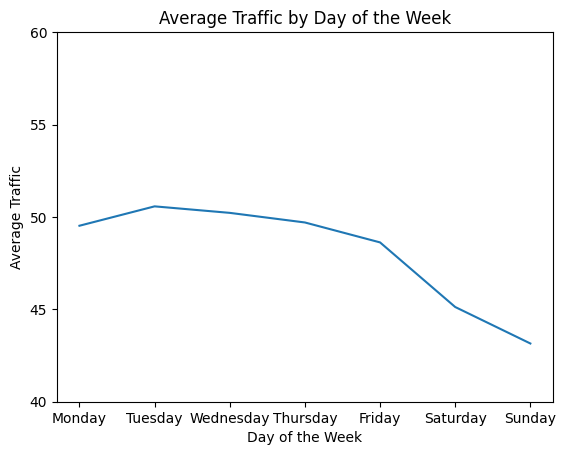

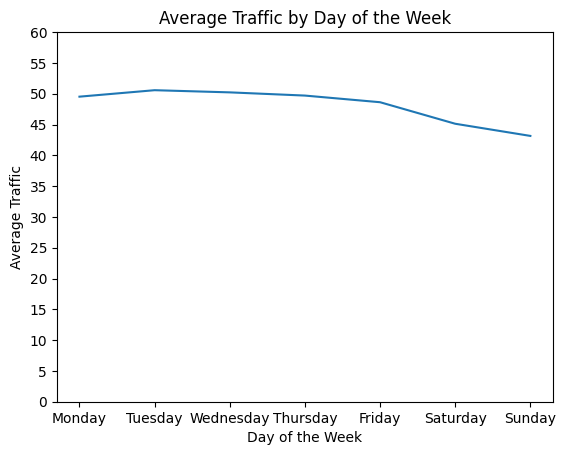

In [14]:
# Group the hourly search data to plot the average traffic by the day of week
# Group the data by hour and calculate the average traffic
df_daily_avg = df_mercado_trends.groupby(df_mercado_trends.index.dayofweek)['Search Trends'].mean()

# Plot the average traffic by the day of the week
df_daily_avg.plot(kind='line', xlabel='Day of the Week', ylabel='Average Traffic')
plt.title('Average Traffic by Day of the Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.yticks(range(40, 61, 5))
plt.show()

# Plot the average traffic by the day of the week as a line chart and force y-axis start to zero.
df_daily_avg.plot(kind='line', xlabel='Day of the Week', ylabel='Average Traffic')
plt.title('Average Traffic by Day of the Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.yticks(range(0, 61, 5))  # Set the minimum value of the Y-axis to 0
plt.show()

#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

<ipython-input-15-74a695ef094c>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_weekly_avg = df_mercado_trends.groupby(df_mercado_trends.index.week)['Search Trends'].mean()


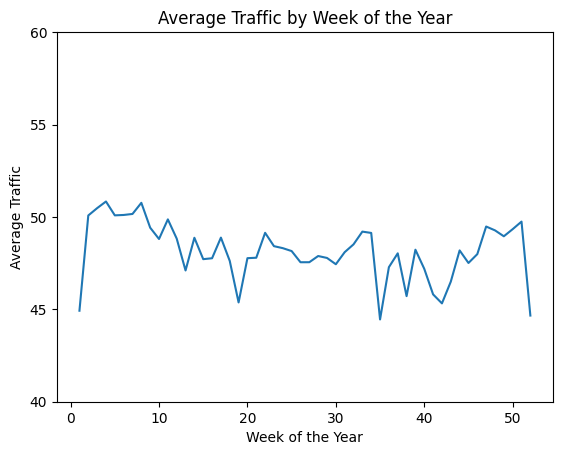

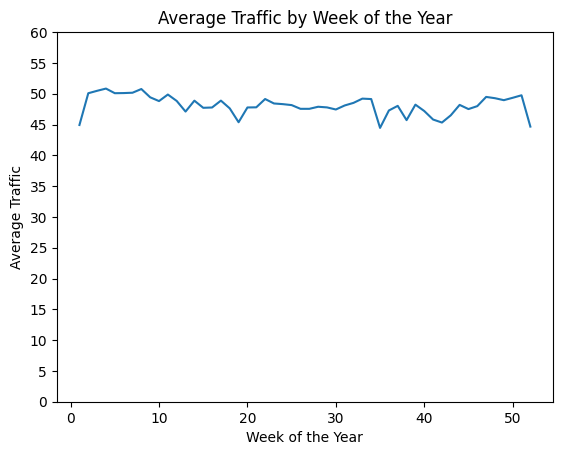

In [15]:
# Group the hourly search data to plot the average traffic by the week of the year
df_weekly_avg = df_mercado_trends.groupby(df_mercado_trends.index.week)['Search Trends'].mean()

# Plot the average traffic by the week of the year
df_weekly_avg.plot(kind='line', xlabel='Week of the Year', ylabel='Average Traffic')
plt.title('Average Traffic by Week of the Year')
plt.yticks(range(40, 61, 5))  # Set the minimum value of the Y-axis to 0
plt.show()



# Plot the average traffic by the week of the year
df_weekly_avg.plot(kind='line', xlabel='Week of the Year', ylabel='Average Traffic')
plt.title('Average Traffic by Week of the Year')
plt.yticks(range(0, 61, 5))  # Set the minimum value of the Y-axis to 0
plt.show()

##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:** Yes! 1. Examining traffic by hour-of-day, the average traffic peaks at hour 0:00 in a 24-hour format.  The function head() does not show an indication of timezone information.  To remedy this hypothesis conflict, I should contact the data provider, but there probably isn't time to do that at this point.  With the timezone information in-hand, a more true-to-locale plot could be displayed  2. By day-of-week, the average traffic peaks at Tuesday, however, the difference between average traffic on Tuesday and the other work days (Monday, Wednesday, Thursday, Friday) is small.  Traffic follows typical consumer-facing businesses: higher traffic during the week, lower traffic during the weekend with the lowest traffic on Sunday.  3. Average traffic by week of the year is consistently between 45 and 50, across the full dataset. There is a dip in traffic to the lowest levels at the end-of-the-year / beginning-of-the-year two week period, consistent with most people spending more time with family and friends during this time, vs interacting with online business sites.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [20]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head(6))
display(df_mercado_stock.tail(6))

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17
2015-01-02 14:00:00,125.77


,close
date,
2020-07-31 10:00:00,1098.770
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


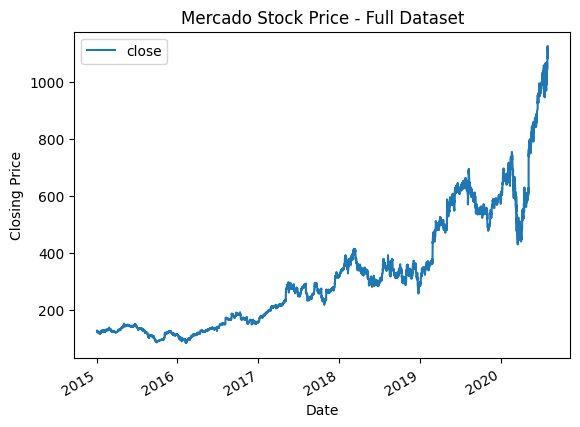

In [21]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.plot(y='close')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Mercado Stock Price - Full Dataset')
plt.show()


In [22]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1)
concatenated_df = pd.concat([df_mercado_stock, df_mercado_trends], axis=1)

# Drop rows with only one column of data. 'thresh=2` parameter specifies that a row should be dropped if it has less than 2 non-null values.
concatenated_df = concatenated_df.dropna(thresh=2)

# View the first and last five rows of the DataFrame
display(concatenated_df.head())
display(concatenated_df.tail())

# Optional - plot the DataFrame

,close,Search Trends
2016-06-01 09:00:00,135.16,6.0
2016-06-01 10:00:00,136.63,12.0
2016-06-01 11:00:00,136.56,22.0
2016-06-01 12:00:00,136.42,33.0
2016-06-01 13:00:00,136.10,40.0


,close,Search Trends
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0
2020-07-31 15:00:00,1122.510,53.0


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [24]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
start_date = '2020-01-01'
end_date = '2020-06-30'

# 'loc' function slices df based on DateTime index column. It selects, for the new df, rows where 'date' column is greater than or equal to 'start_date' and less than or equal to 'end_date'.
sliced_df = concatenated_df.loc[start_date:end_date]

# View the first and last five rows of first_half_2020 DataFrame
display(sliced_df.head())
display(sliced_df.tail())

,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


,close,Search Trends
2020-06-30 11:00:00,976.17,17.0
2020-06-30 12:00:00,977.50,27.0
2020-06-30 13:00:00,973.23,37.0
2020-06-30 14:00:00,976.50,45.0
2020-06-30 15:00:00,984.93,51.0


<Axes: >

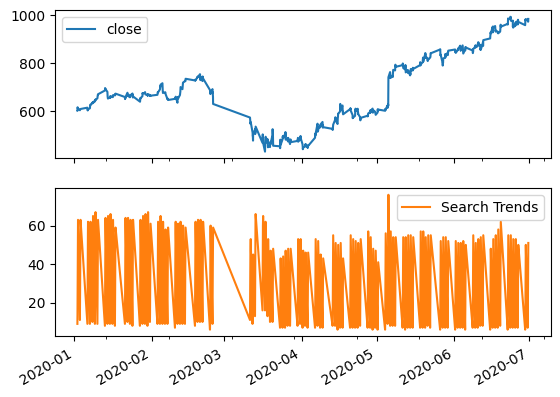

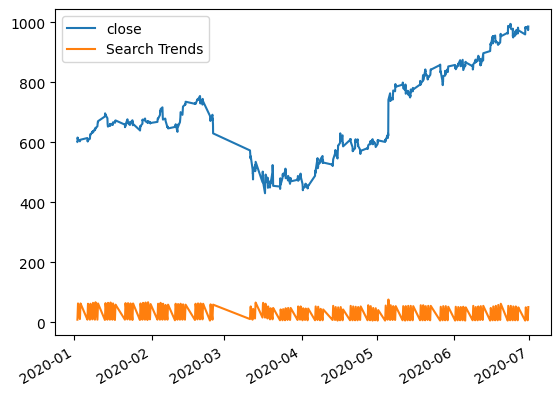

In [25]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
sliced_df.plot(subplots=True)

# Curiosity on 'False' parameter
sliced_df.plot(subplots=False)

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** In truth, our evidence of a common trend between search activity and stock price is pretty limited. It does appear generally however that the low point for Mercado Libre's stock price, late March to early April, did coincide with lower search activity for the firm. Search activity does pick up along with its stock price, although the stock price from mid-April onward definitively outpaces search interest.

There's one important thing to note: if you zoom in both graphs to the spike around May 5th, 2020, you'll find the date of the company's earnings release to the public. It looks like search traffic for the firm spiked about two hours before the firm's stock price spiked. This could indicate a predictable pattern (can Google Searches predict the stock price?), but an alternative explanation might just be that people tend to search for more information about the firm right before an earnings announcement gets released. We'd need to do a little more time-series research to see which explanation best fits the data.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [26]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
mercado_stock_trends_df = concatenated_df
mercado_stock_trends_df['Lagged Search Trends'] = mercado_stock_trends_df['Search Trends'].shift(1, freq='H')

# View the first and last five rows of the DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())


,close,Search Trends,Lagged Search Trends
2016-06-01 09:00:00,135.16,6.0,NaN
2016-06-01 10:00:00,136.63,12.0,6.0
2016-06-01 11:00:00,136.56,22.0,12.0
2016-06-01 12:00:00,136.42,33.0,22.0
2016-06-01 13:00:00,136.10,40.0,33.0


,close,Search Trends,Lagged Search Trends
2020-07-31 11:00:00,1105.780,20.0,11.0
2020-07-31 12:00:00,1087.925,32.0,20.0
2020-07-31 13:00:00,1095.800,41.0,32.0
2020-07-31 14:00:00,1110.650,47.0,41.0
2020-07-31 15:00:00,1122.510,53.0,47.0


In [30]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
num_periods = 4
mercado_stock_trends_df['Stock Volatility'] = mercado_stock_trends_df['close'].rolling(num_periods).std()

# View the first and last five rows of the DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())



,close,Search Trends,Lagged Search Trends,Stock Volatility
2016-06-01 09:00:00,135.16,6.0,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN
2016-06-01 11:00:00,136.56,22.0,12.0,NaN
2016-06-01 12:00:00,136.42,33.0,22.0,0.693848
2016-06-01 13:00:00,136.10,40.0,33.0,0.235142


,close,Search Trends,Lagged Search Trends,Stock Volatility
2020-07-31 11:00:00,1105.780,20.0,11.0,7.495900
2020-07-31 12:00:00,1087.925,32.0,20.0,12.188462
2020-07-31 13:00:00,1095.800,41.0,32.0,7.393646
2020-07-31 14:00:00,1110.650,47.0,41.0,10.169735
2020-07-31 15:00:00,1122.510,53.0,47.0,15.408790


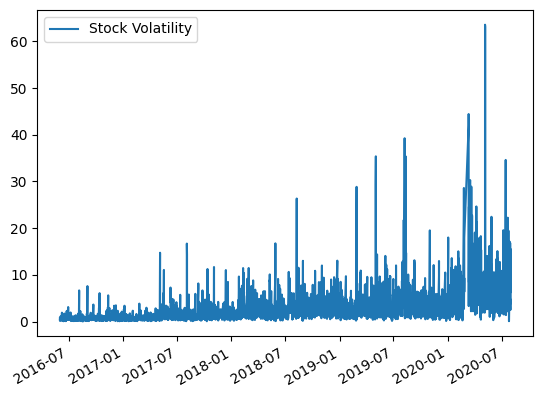

In [37]:
# Visualize the stock volatility
mercado_stock_trends_df.plot(kind='line', y='Stock Volatility')
plt.show()


# Plot the average traffic by the day of the week
# df_daily_avg.plot(kind='line', xlabel='Day of the Week', ylabel='Average Traffic')
# plt.title('Average Traffic by Day of the Week')
# plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# plt.yticks(range(40, 61, 5))
# plt.show()


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [40]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
mercado_stock_trends_df['Hourly Stock Return'] = mercado_stock_trends_df['close'].pct_change() * 100

In [41]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())

,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN,1.087600
2016-06-01 11:00:00,136.56,22.0,12.0,NaN,-0.051233
2016-06-01 12:00:00,136.42,33.0,22.0,0.693848,-0.102519
2016-06-01 13:00:00,136.10,40.0,33.0,0.235142,-0.234570


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,11.0,7.495900,0.637986
2020-07-31 12:00:00,1087.925,32.0,20.0,12.188462,-1.614697
2020-07-31 13:00:00,1095.800,41.0,32.0,7.393646,0.723855
2020-07-31 14:00:00,1110.650,47.0,41.0,10.169735,1.355174
2020-07-31 15:00:00,1122.510,53.0,47.0,15.408790,1.067843


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [43]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
# Select the columns of interest
columns_of_interest = ['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']
selected_columns = mercado_stock_trends_df[columns_of_interest]

# Construct the correlation table
correlation_table = selected_columns.corr()

# View the correlation table
display(correlation_table)

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.20801,0.046723
Lagged Search Trends,-0.208010,1.00000,-0.005230
Hourly Stock Return,0.046723,-0.00523,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** If we read down the second column (or read along the second row), we see that there's a slight negative correlation between searches for the firm and its subsequent stock volatility. More searches (slightly) tend to indicate less near-term hourly stock risk for the firm.

On the other hand, there's a positive correlation between search activity in one hour and stock returns in the next: as search activity goes up, so will the firm's stock price in the short term. This effect is very weak though, only half the size of the effect on stock volatility. With the correlation so close to zero, some might also say that there's almost no relationship between these two variables whatsoever, and that the small findings that we do have could be just due to chance. While there's no required threshold when looking at correlation between stock returns and the variables used to predict them, it does tend to be that correlations in this context tend to be very low across the board. It's hard to predict the market!

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [45]:
display(df_mercado_trends.head(2))

,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92


In [46]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
df_mercado_trends = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
df_mercado_trends.columns = ['ds', 'y']

display(df_mercado_trends.head(2))

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92


In [48]:
# Drop an NaN values from the prophet_df DataFrame
mercado_prophet_df = df_mercado_trends.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(mercado_prophet_df.head())
display(mercado_prophet_df.tail())

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [49]:
# Call the Prophet function, store as an object
prophet_model = Prophet()
# The above code creates an instance of the Prophet class and assigns it to the variable `prophet_model`.
# You can now use this object to fit the model, make predictions, and perform other operations provided by the Prophet library.

In [50]:
# Fit the time-series model.
prophet_model.fit(mercado_prophet_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3g0ttbtu/cv1gse5s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3g0ttbtu/osopvef0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63810', 'data', 'file=/tmp/tmp3g0ttbtu/cv1gse5s.json', 'init=/tmp/tmp3g0ttbtu/osopvef0.json', 'output', 'file=/tmp/tmp3g0ttbtu/prophet_modelzv6lzr50/prophet_model-20240103222338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:23:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:24:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [51]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_prophet_df = prophet_model.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
display(future_mercado_prophet_df.tail())

,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [52]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
predictions = prophet_model.predict(future_mercado_prophet_df)

# Display the first five rows of the forecast_mercado_trends DataFrame
display(predictions.head())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.469500,80.743481,98.430051,44.469500,44.469500,45.159722,45.159722,45.159722,41.452703,...,1.860594,1.860594,1.860594,1.846426,1.846426,1.846426,0.0,0.0,0.0,89.629222
1,2016-06-01 01:00:00,44.470406,78.270456,94.203399,44.470406,44.470406,41.605529,41.605529,41.605529,37.943556,...,1.810498,1.810498,1.810498,1.851474,1.851474,1.851474,0.0,0.0,0.0,86.075935
2,2016-06-01 02:00:00,44.471312,67.014951,84.017581,44.471312,44.471312,31.282049,31.282049,31.282049,27.656646,...,1.768912,1.768912,1.768912,1.856491,1.856491,1.856491,0.0,0.0,0.0,75.753361
3,2016-06-01 03:00:00,44.472218,52.877742,69.031551,44.472218,44.472218,16.014826,16.014826,16.014826,12.417424,...,1.735926,1.735926,1.735926,1.861476,1.861476,1.861476,0.0,0.0,0.0,60.487045
4,2016-06-01 04:00:00,44.473124,35.450364,52.587575,44.473124,44.473124,-1.100073,-1.100073,-1.100073,-4.677999,...,1.711496,1.711496,1.711496,1.866430,1.866430,1.866430,0.0,0.0,0.0,43.373051


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

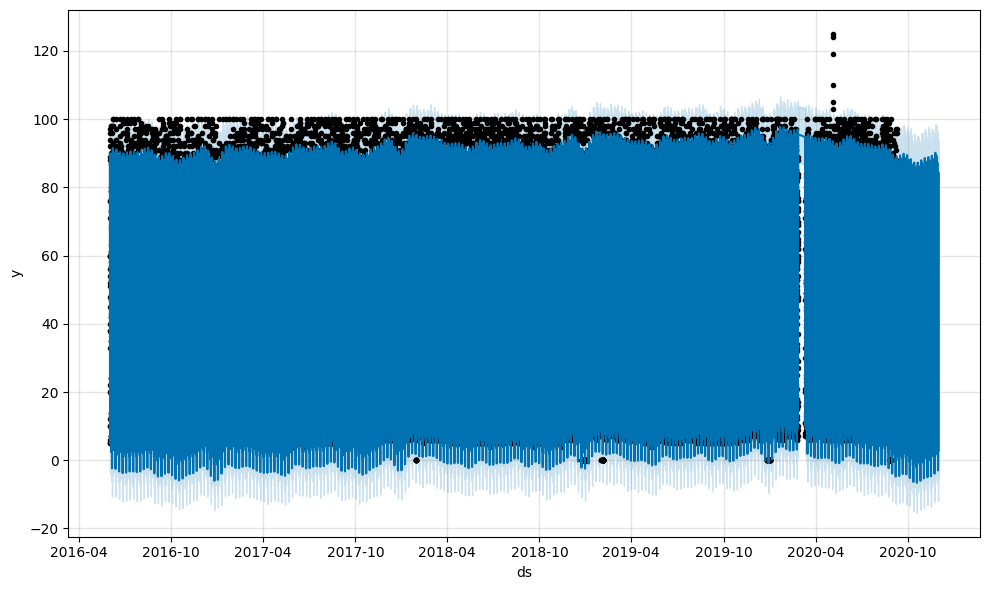

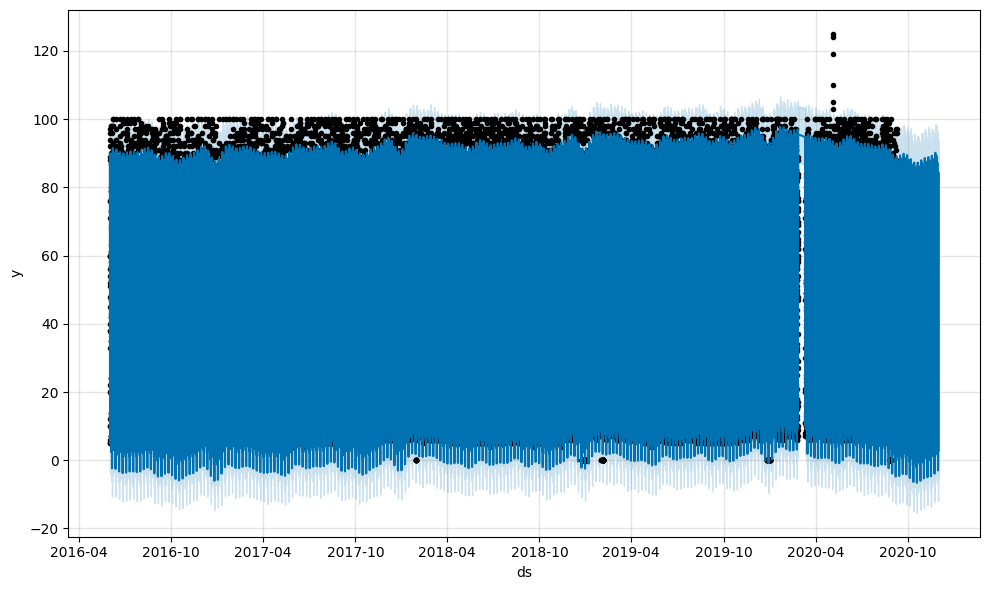

In [53]:
# Plot the Prophet predictions for the Mercado trends data
prophet_model.plot(predictions)

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**  Rough.  Seems a bear market is coming, with a double-dip in stock price over the next 80 days.


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [55]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends = predictions
forecast_mercado_trends = forecast_mercado_trends.set_index('ds')


# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
selected_columns = forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']]
display(selected_columns.head())


,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.629222,80.743481,98.430051
2016-06-01 01:00:00,86.075935,78.270456,94.203399
2016-06-01 02:00:00,75.753361,67.014951,84.017581
2016-06-01 03:00:00,60.487045,52.877742,69.031551
2016-06-01 04:00:00,43.373051,35.450364,52.587575


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

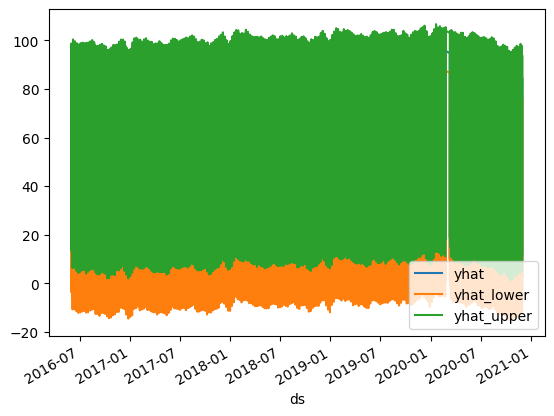

In [57]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
selected_columns.plot(kind='line', y=['yhat', 'yhat_lower', 'yhat_upper'])
plt.show()

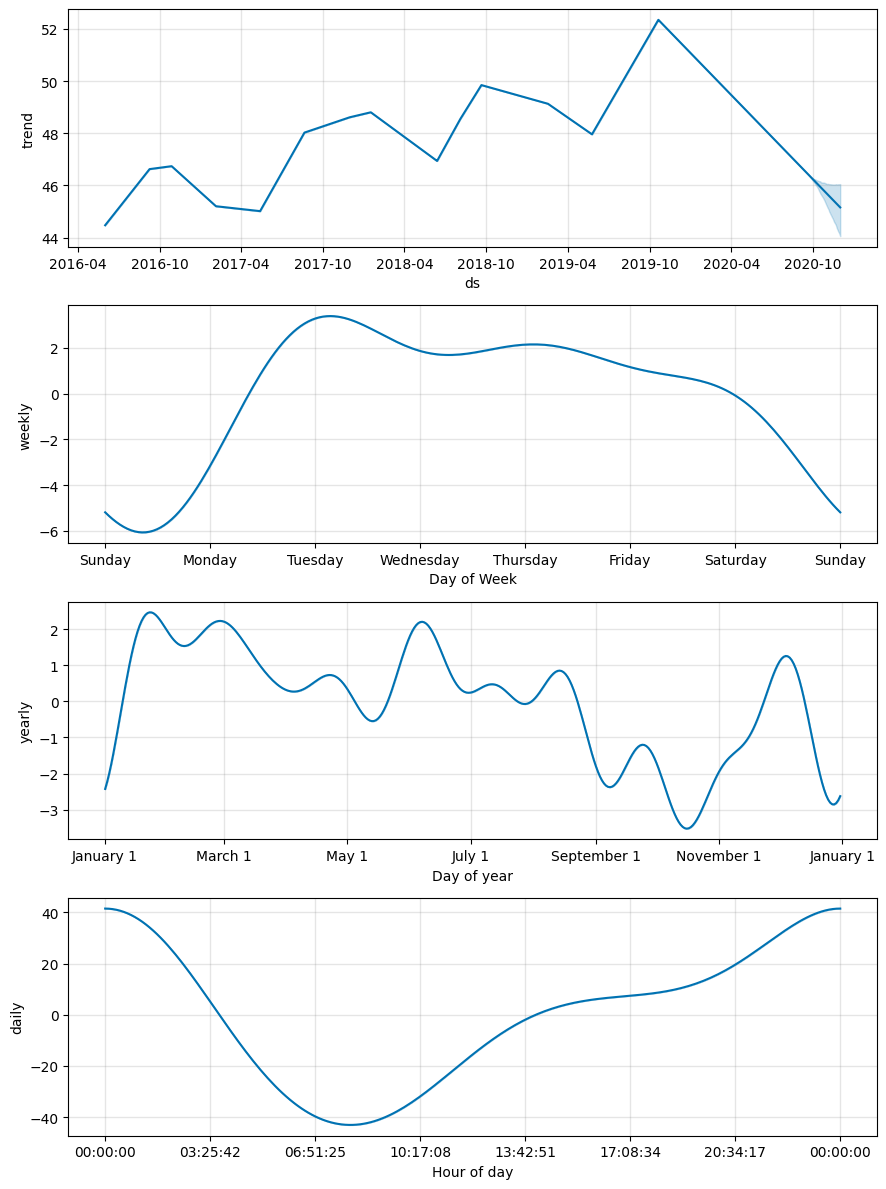

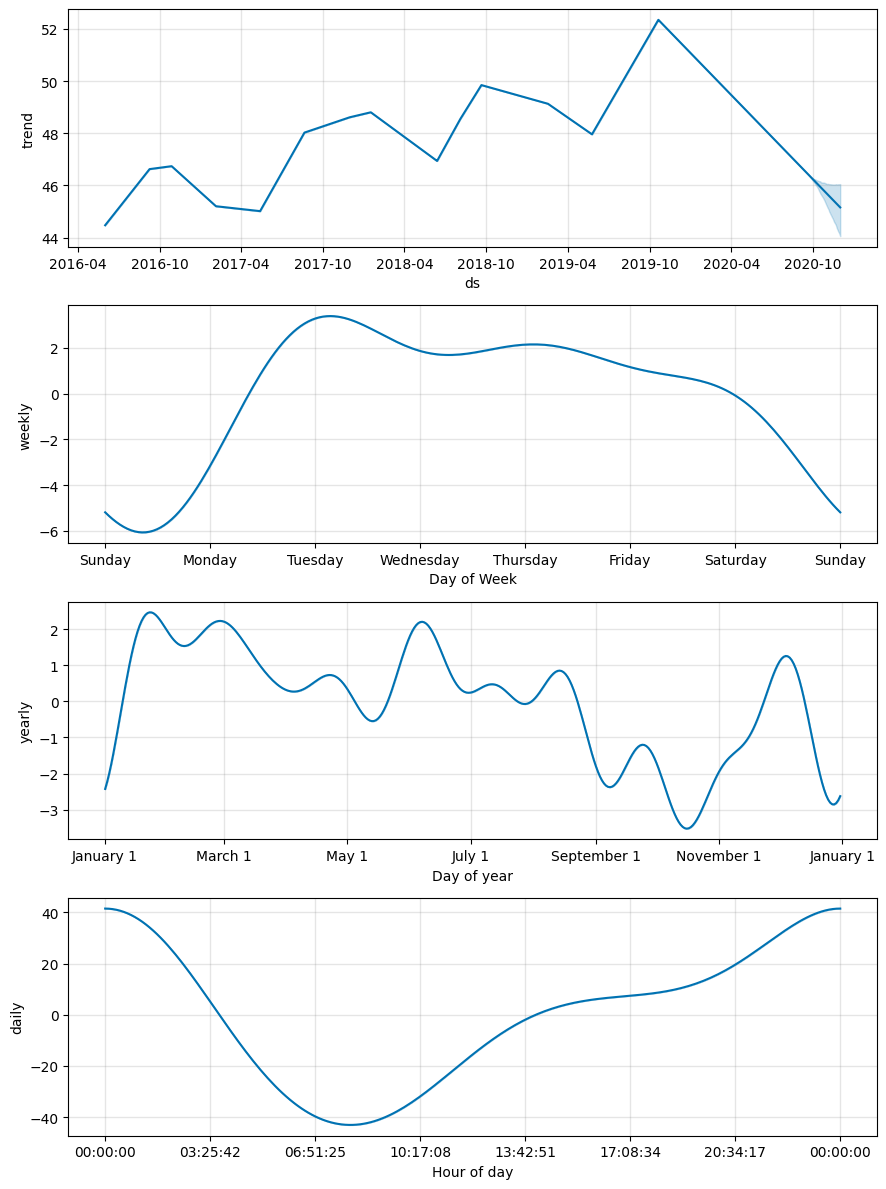

In [59]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends = forecast_mercado_trends.reset_index()
# display(forecast_mercado_trends.head())

# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame
prophet_model.plot_components(predictions)

##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** The time corresponding with the zero hour in the csv file.

**Question:** Which day of week gets the most search traffic?
   
**Answer:**Tuesday.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:**Mid-October.